In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md
import matplotlib.ticker as tkr

# Importing the data and initial validations

In [2]:
# Visualisations theme
sns.set_theme()

# Importing data
df = pd.read_csv('data.csv')

df.head()

,install_date,operating_system,d0_dau,d1_dau,d2_dau,d3_dau,d4_dau,d5_dau,d6_dau,d7_dau,...,d51_dau,d52_dau,d53_dau,d54_dau,d55_dau,d56_dau,d57_dau,d58_dau,d59_dau,d60_dau
0,1/1/70,iOS,48583,19529,17466,15571,14059,12770,11433,10334,...,899,876,851,831,814,790,765,752,734,717
1,2/1/70,iOS,49894,20127,17834,15835,14337,12911,11700,10560,...,880,857,831,814,791,778,753,741,731,719
2,3/1/70,iOS,51285,20828,18560,16517,14885,13288,11891,10699,...,862,842,814,799,785,773,748,729,719,711
3,4/1/70,iOS,50062,20251,18264,16364,14814,13322,11920,10814,...,881,852,838,824,808,785,768,755,745,734
4,5/1/70,iOS,54965,22416,20099,18046,16220,14532,13250,11949,...,990,963,932,901,882,863,843,824,807,793


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 63 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   install_date      730 non-null    object
 1   operating_system  730 non-null    object
 2   d0_dau            730 non-null    int64 
 3   d1_dau            730 non-null    int64 
 4   d2_dau            730 non-null    int64 
 5   d3_dau            730 non-null    int64 
 6   d4_dau            730 non-null    int64 
 7   d5_dau            730 non-null    int64 
 8   d6_dau            730 non-null    int64 
 9   d7_dau            730 non-null    int64 
 10  d8_dau            730 non-null    int64 
 11  d9_dau            730 non-null    int64 
 12  d10_dau           730 non-null    int64 
 13  d11_dau           730 non-null    int64 
 14  d12_dau           730 non-null    int64 
 15  d13_dau           730 non-null    int64 
 16  d14_dau           730 non-null    int64 
 17  d15_dau         

In [4]:
# Changing date format to datetime
df['install_date'] = pd.to_datetime(df['install_date'], format = '%d/%m/%y')

# Check if there are duplicated rows
df.duplicated().sum()

0

No duplicated rows

In [5]:
# Check different operating systems
operating_systems = df.operating_system.unique()
operating_systems

array(['iOS', 'Android'], dtype=object)

In [6]:
# Check the number of missing values
df.isnull().sum()

install_date        0
operating_system    0
d0_dau              0
d1_dau              0
d2_dau              0
                   ..
d56_dau             0
d57_dau             0
d58_dau             0
d59_dau             0
d60_dau             0
Length: 63, dtype: int64

In [7]:
# Check there's no duplicated dates
for os in operating_systems:
    print(f"""{os}: {df[df['operating_system']==os].install_date.duplicated().sum()}""")

iOS: 0
Android: 0


In [8]:
# Adding standard retention columns
retention_columns = []
for i in [1,3,7,14,30,60]:
    retention_name = f"""d{i}_ret"""
    dau_name = f"""d{i}_dau"""
    df[retention_name] = df[dau_name]/df['d0_dau']
    retention_columns.append(retention_name)

# Analysis

## Installs

In [9]:
# Information of installs by operating system
os = operating_systems[0]
os_df = df.loc[df['operating_system'] == os, ['install_date','operating_system','d0_dau']]
print(f"""{os}:\n {os_df.describe()}""")
print(f"""installs first and last day:\n {os_df[os_df['install_date'].isin([os_df['install_date'].min(), os_df['install_date'].max()])]}""")
print(f"""date of min installs:\n {os_df[os_df['d0_dau']==os_df['d0_dau'].min()]}""")
print(f"""date of max installs:\n {os_df[os_df['d0_dau']==os_df['d0_dau'].max()]}""")

iOS:
               d0_dau
count     365.000000
mean   142456.649315
std     73015.443198
min     46946.000000
25%     79398.000000
50%    124474.000000
75%    195068.000000
max    332564.000000
installs first and last day:
     install_date operating_system  d0_dau
0     1970-01-01              iOS   48583
364   1970-12-31              iOS  313942
date of min installs:
   install_date operating_system  d0_dau
6   1970-01-07              iOS   46946
date of max installs:
     install_date operating_system  d0_dau
362   1970-12-29              iOS  332564


In [10]:
# Information of installs by operating system
os = operating_systems[1]
os_df = df.loc[df['operating_system'] == os, ['install_date','operating_system','d0_dau']]
print(f"""{os}:\n {os_df.describe()}""")
print(f"""installs first and last day:\n {os_df[os_df['install_date'].isin([os_df['install_date'].min(), os_df['install_date'].max()])]}""")
print(f"""date of min installs:\n {os_df[os_df['d0_dau']==os_df['d0_dau'].min()]}""")
print(f"""date of max installs:\n {os_df[os_df['d0_dau']==os_df['d0_dau'].max()]}""")

Android:
               d0_dau
count     365.000000
mean   139012.479452
std     42511.899701
min     89086.000000
25%    103447.000000
50%    124278.000000
75%    169020.000000
max    255501.000000
installs first and last day:
     install_date operating_system  d0_dau
365   1970-01-01          Android   92509
729   1970-12-31          Android   98358
date of min installs:
     install_date operating_system  d0_dau
655   1970-10-18          Android   89086
date of max installs:
     install_date operating_system  d0_dau
533   1970-06-18          Android  255501


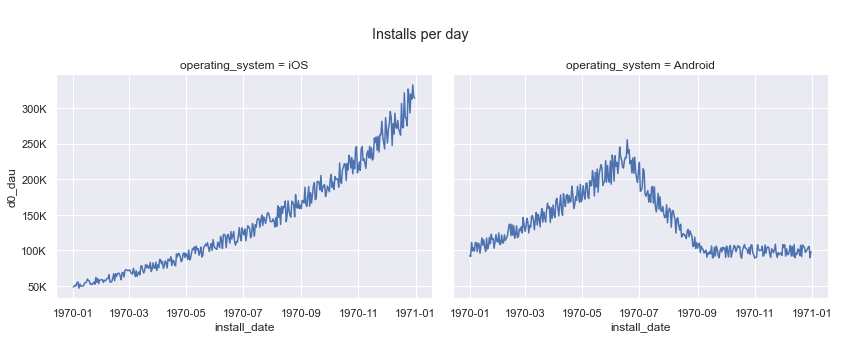

In [11]:
# Plotting installs per day
g = sns.FacetGrid(df, col='operating_system',
    col_wrap=2, sharey=True,
    height=4.5, aspect=1.3)
g.map(sns.lineplot, 'install_date', 'd0_dau')
g.add_legend()
sns.move_legend(g, loc='lower right', bbox_to_anchor=(1, 1), frameon=False)
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{y/1000:.0f}K'))
g.figure.suptitle('Installs per day')
g.figure.tight_layout()

- Installs are growing exponentially for iOS, from 49K daily to over 300K after 1 year. As the installs increase we can also see an increase in their daily variance.
- Android installs start from a higher initial point 93K, growing over 250K in June increasing also the daily variance. However after the peak in June installs start to decrease finding a plateau after September returning to January levels
- A possible explanation for the changes in amount of users would be changes in User Acquisition. The budget seems to be increasing for iOS, potentially thanks to better results, while it was decreased in Android for opposite reasons.
- The plateau could be explained either by Return on Ad spend targets being reached only at the 90K installs scale or this could be the natural organic traffic of the game.

## Retention

In [12]:
# Formatting dataframe for plotting
df_retention = df.melt(id_vars=['install_date','operating_system'],
                       value_vars=retention_columns, var_name='retention_day',value_name='retention')
df_retention.head()

,install_date,operating_system,retention_day,retention
0,1970-01-01,iOS,d1_ret,0.401972
1,1970-01-02,iOS,d1_ret,0.403395
2,1970-01-03,iOS,d1_ret,0.406123
3,1970-01-04,iOS,d1_ret,0.404518
4,1970-01-05,iOS,d1_ret,0.407823


In [13]:
# Information of retention by operating system
for os in operating_systems:
    os_df = df.loc[df['operating_system'] == os, ['install_date','operating_system']+retention_columns]
    print(f"""{os}:\n {os_df.describe()}""")

iOS:
            d1_ret      d3_ret      d7_ret     d14_ret     d30_ret     d60_ret
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000
mean     0.396283    0.307228    0.194196    0.097700    0.031016    0.009084
std      0.020411    0.040205    0.045609    0.033759    0.015301    0.006394
min      0.320484    0.163665    0.043807    0.005064    0.000199    0.000000
25%      0.401064    0.318909    0.209826    0.109942    0.020639    0.001386
50%      0.403255    0.322768    0.213428    0.113759    0.039559    0.013598
75%      0.405776    0.325136    0.215995    0.116040    0.040546    0.014328
max      0.407998    0.332398    0.226519    0.123809    0.043537    0.015846
Android:
            d1_ret      d3_ret      d7_ret     d14_ret     d30_ret     d60_ret
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000
mean     0.401007    0.316996    0.205901    0.107567    0.035569    0.011468
std      0.012381    0.024858    0.029543    0.0

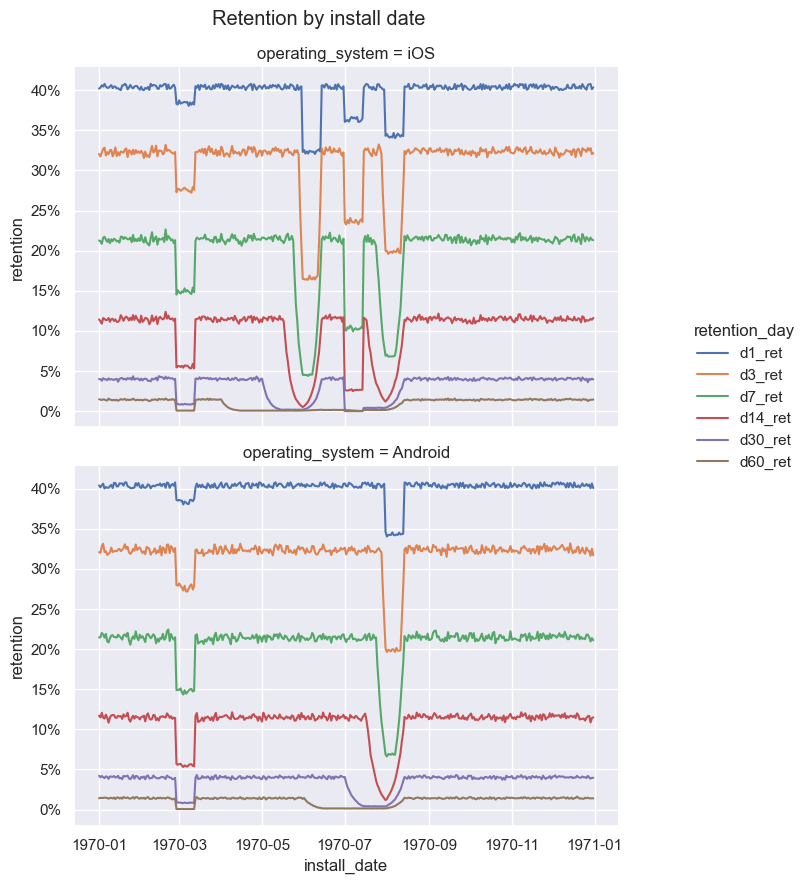

In [14]:
# Plotting retention
g = sns.FacetGrid(df_retention, col='operating_system', hue='retention_day',
    col_wrap=1, sharey=True,
    height=4.5, aspect=1.2)
g.map(sns.lineplot, 'install_date', 'retention')
g.add_legend()
sns.move_legend(g, loc='center right', bbox_to_anchor=(1.25, .55), frameon=False)
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{y*100:.0f}%'))
g.figure.suptitle('Retention by install date')
g.figure.tight_layout()

- There are clear patterns in retention drop for both platforms during March and August
- The drops in retention are consistent across different retention days during March, but not for the August retention drop
- Additionally iOS has also retention drops during June and July
- The drops in retention are not connected to changes on the number of Installs
- For the non consistend drops in retention after day 7 a likely explanation is issues on data integrity. Would be quite unlikely that a change in late parts of the game affects heavily the retention in such inconsistent manner and remains stable after early retention decreases
- The case with day 60 retention is particularly extreme, considering that is also during a limited period it's likely that's a data
- For the consistent drops in retention a possibility is changes in the install mix. For example installs could have increased in a particular geo or country that has traditionally lower retention, or they could be allocated to a specific type of campaign. For example install based instead of value based. Another option is an issue early on the game that affects all the retention in subsequent periods
- Overall retention numbers for the game look healthy and in puzzle industry standards

We will also review if there is a particular day in which the retention integrity is compromised, besides the standard days

In [15]:
# Adding retention columns
retention_columns_full = []
df_retention_all = df.copy()
for i in range(1,61):
    retention_name = i
    dau_name = f"""d{i}_dau"""
    df_retention_all[retention_name] = df_retention_all[dau_name]/df_retention_all['d0_dau']
    retention_columns_full.append(retention_name)

In [16]:
# Formatting dataframe for plotting
df_retention_full = df_retention_all.melt(id_vars=['install_date','operating_system','d0_dau'],
                       value_vars=retention_columns_full, var_name='retention_day',value_name='retention')
df_retention_full['retention_day'] = df_retention_full['retention_day'].astype(int)

# Calculating first date of the week
df_retention_full['install_week'] = df_retention_full['install_date'] - pd.to_timedelta(df_retention_full['install_date'].dt.isocalendar().day - 1, unit='d')

# Adding columns for weighted average
df_retention_full['retention_weighted'] = df_retention_full['retention'] * df_retention_full['d0_dau']

# Grouping information by week
df_retention_full_week = df_retention_full.groupby(['operating_system','retention_day','install_week']).sum().reset_index()
df_retention_full_week['retention'] = df_retention_full_week['retention_weighted']/df_retention_full_week['d0_dau']

# Cleaning helper columns
df_retention_full_week.drop(['retention_weighted','d0_dau'], axis=1, inplace=True)
df_retention_full_week['month'] = df_retention_full_week['install_week'].dt.month

df_retention_full_week.head()


,operating_system,retention_day,install_week,retention,month
0,Android,1,1969-12-29,0.404120,12
1,Android,1,1970-01-05,0.401874,1
2,Android,1,1970-01-12,0.405569,1
3,Android,1,1970-01-19,0.403584,1
4,Android,1,1970-01-26,0.403320,1


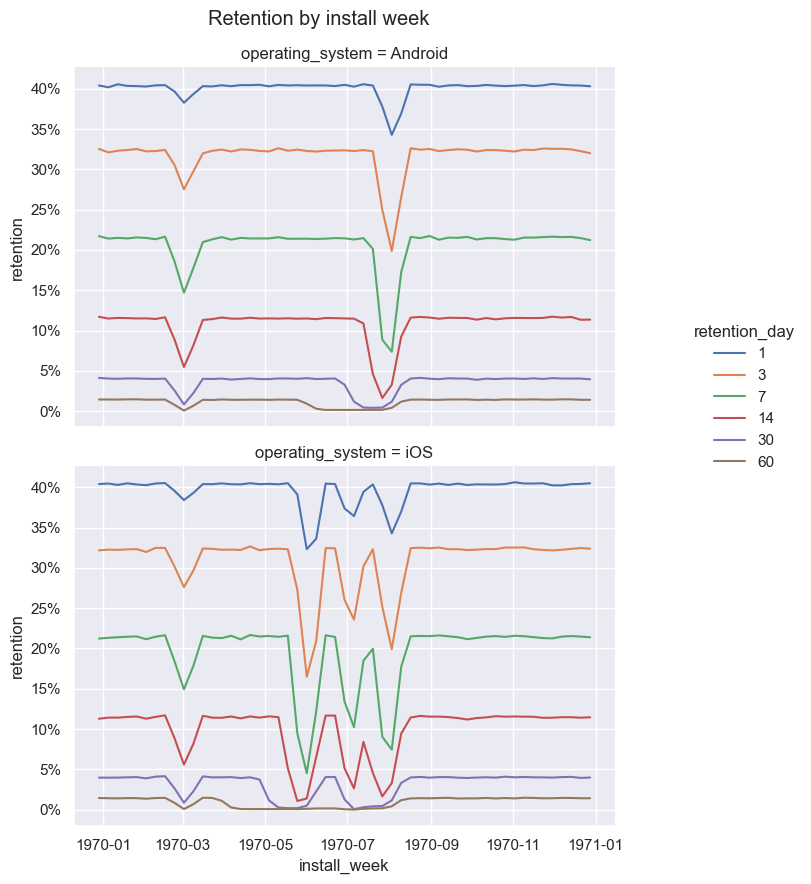

In [17]:
# Plotting retention again to check problematic weeks
g = sns.FacetGrid(df_retention_full_week[df_retention_full_week['retention_day'].isin([1,3,7,14,30,60])],
    col='operating_system', hue='retention_day',
    col_wrap=1, sharey=True,
    height=4.5, aspect=1.2)
g.map(sns.lineplot, 'install_week', 'retention')
g.add_legend()
sns.move_legend(g, loc='center right', bbox_to_anchor=(1.25, .55), frameon=False)
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{y*100:.0f}%'))
g.figure.suptitle('Retention by install week')
g.figure.tight_layout()

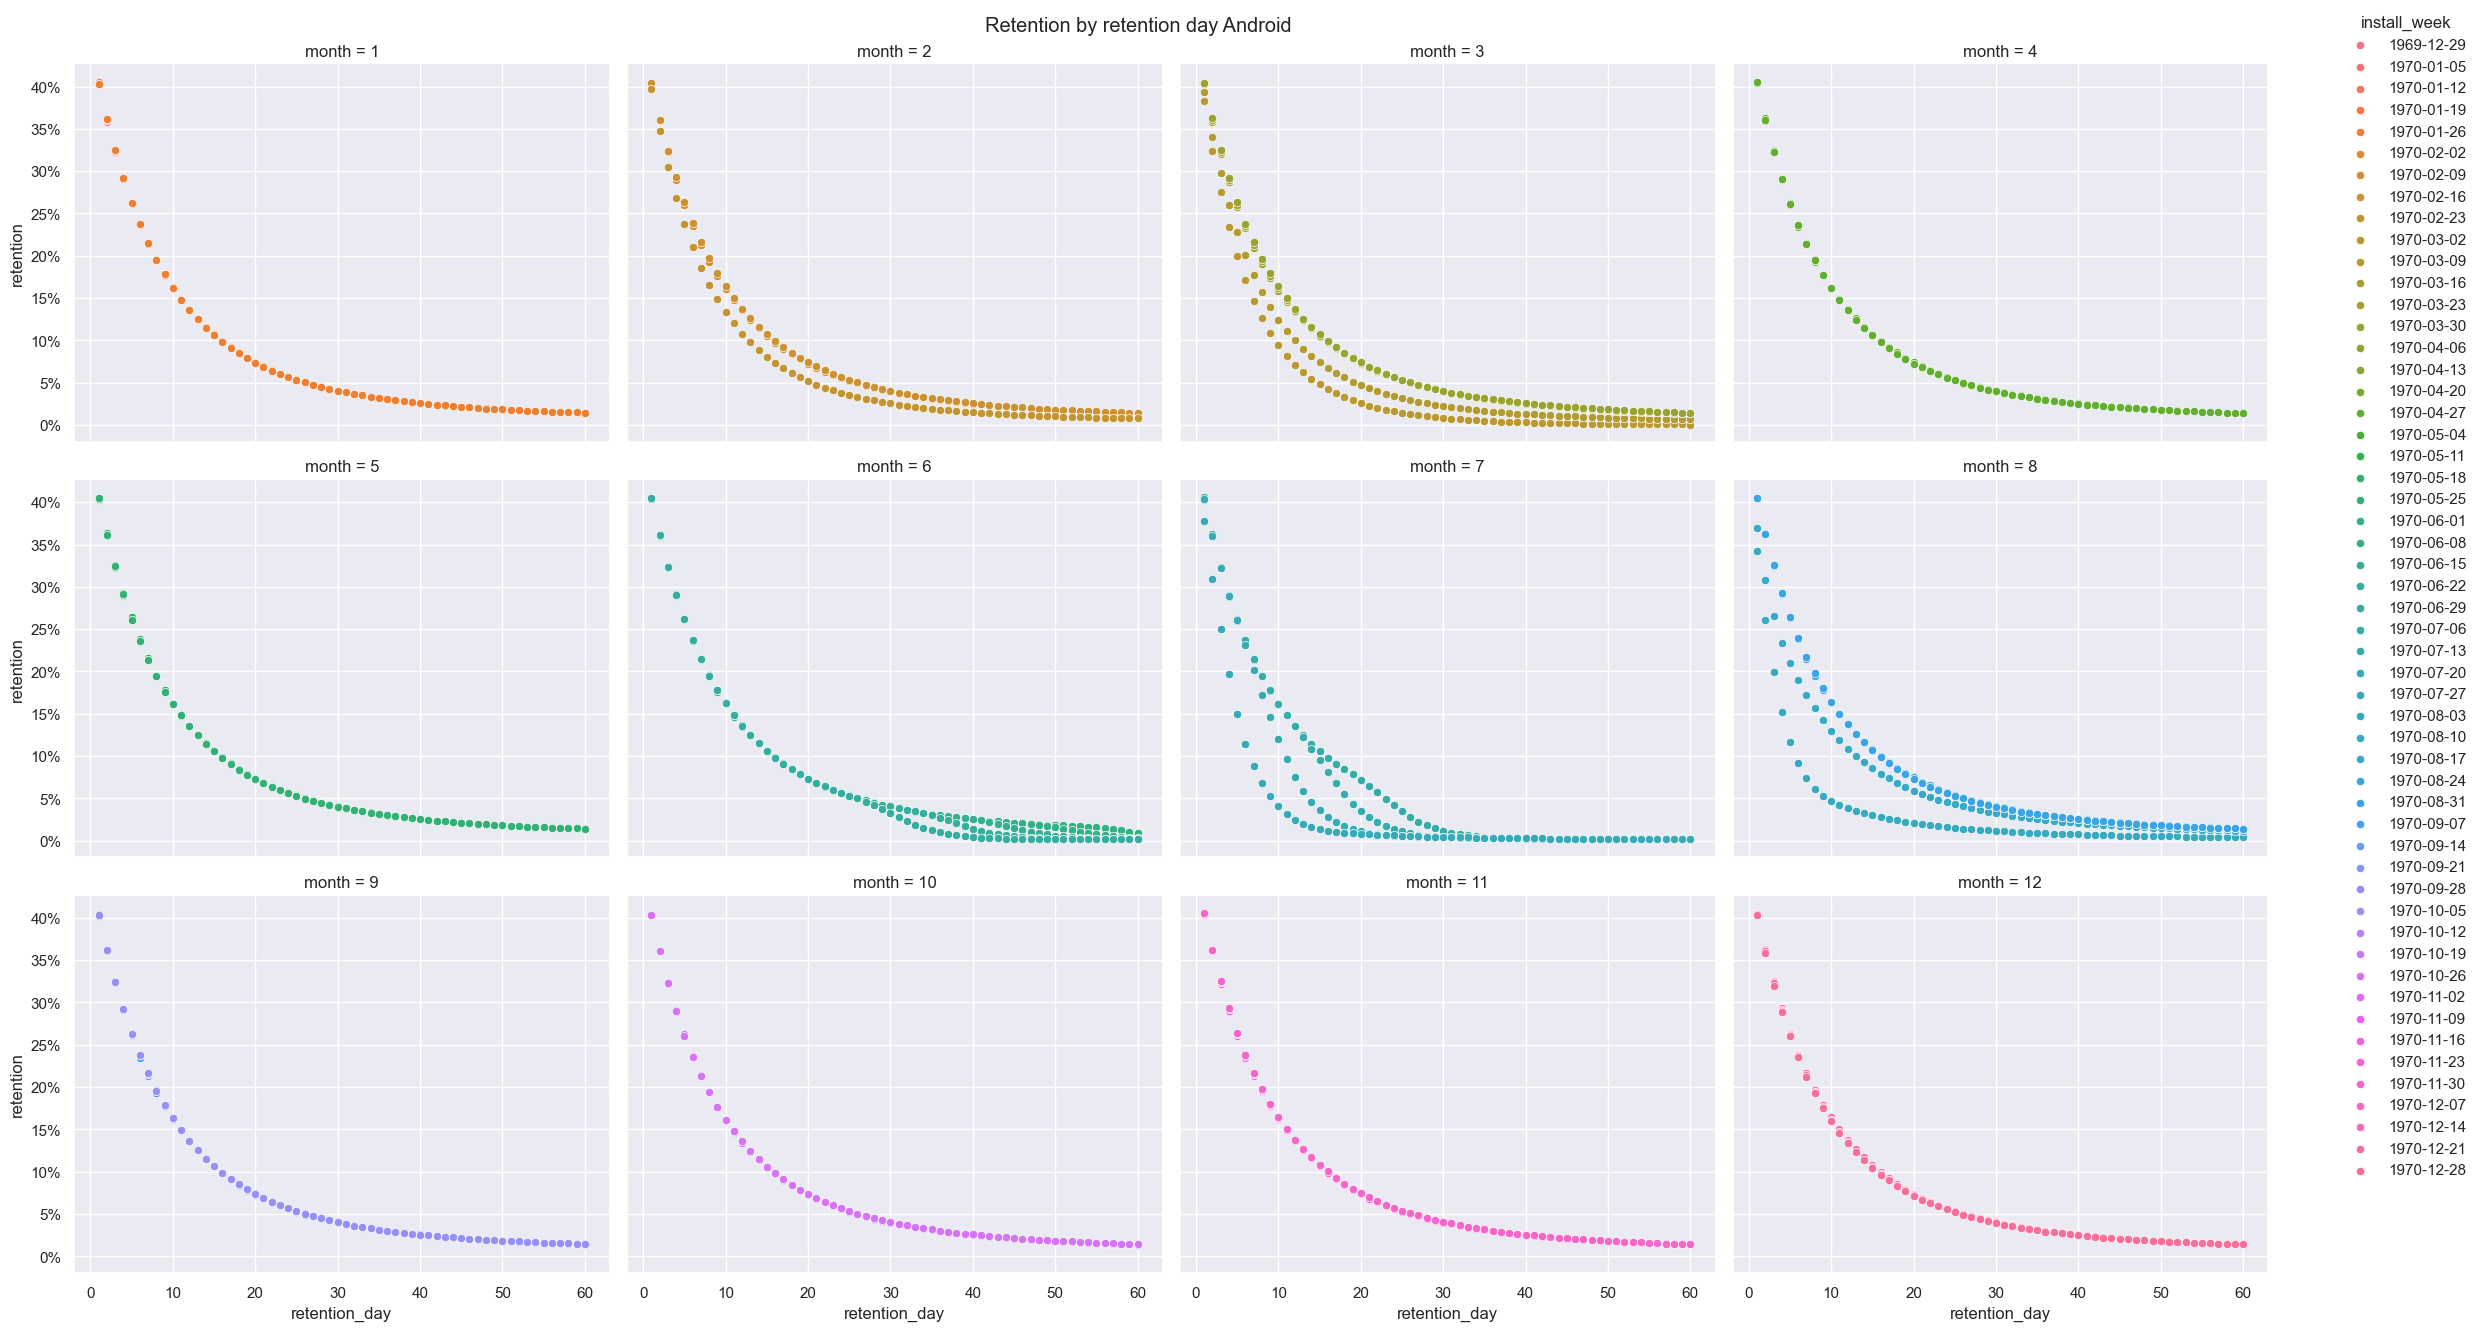

In [18]:
# Reformatting for nice legend
df_retention_full_week['install_week'] = df_retention_full_week['install_week'].dt.strftime('%Y-%m-%d')

# Plotting retention for os
os_selection = 'Android'
g = sns.FacetGrid(df_retention_full_week[df_retention_full_week['operating_system'] == os_selection],
    col='month', hue='install_week',
    col_wrap=4, sharey=True,
    height=4.5, aspect=1.2)
g.map(sns.scatterplot, 'retention_day', 'retention')
g.add_legend()
sns.move_legend(g, loc='center left', bbox_to_anchor=(1.02, .55), frameon=False)
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{y*100:.0f}%'))
g.figure.suptitle(f'Retention by retention day {os_selection}')
g.figure.tight_layout()

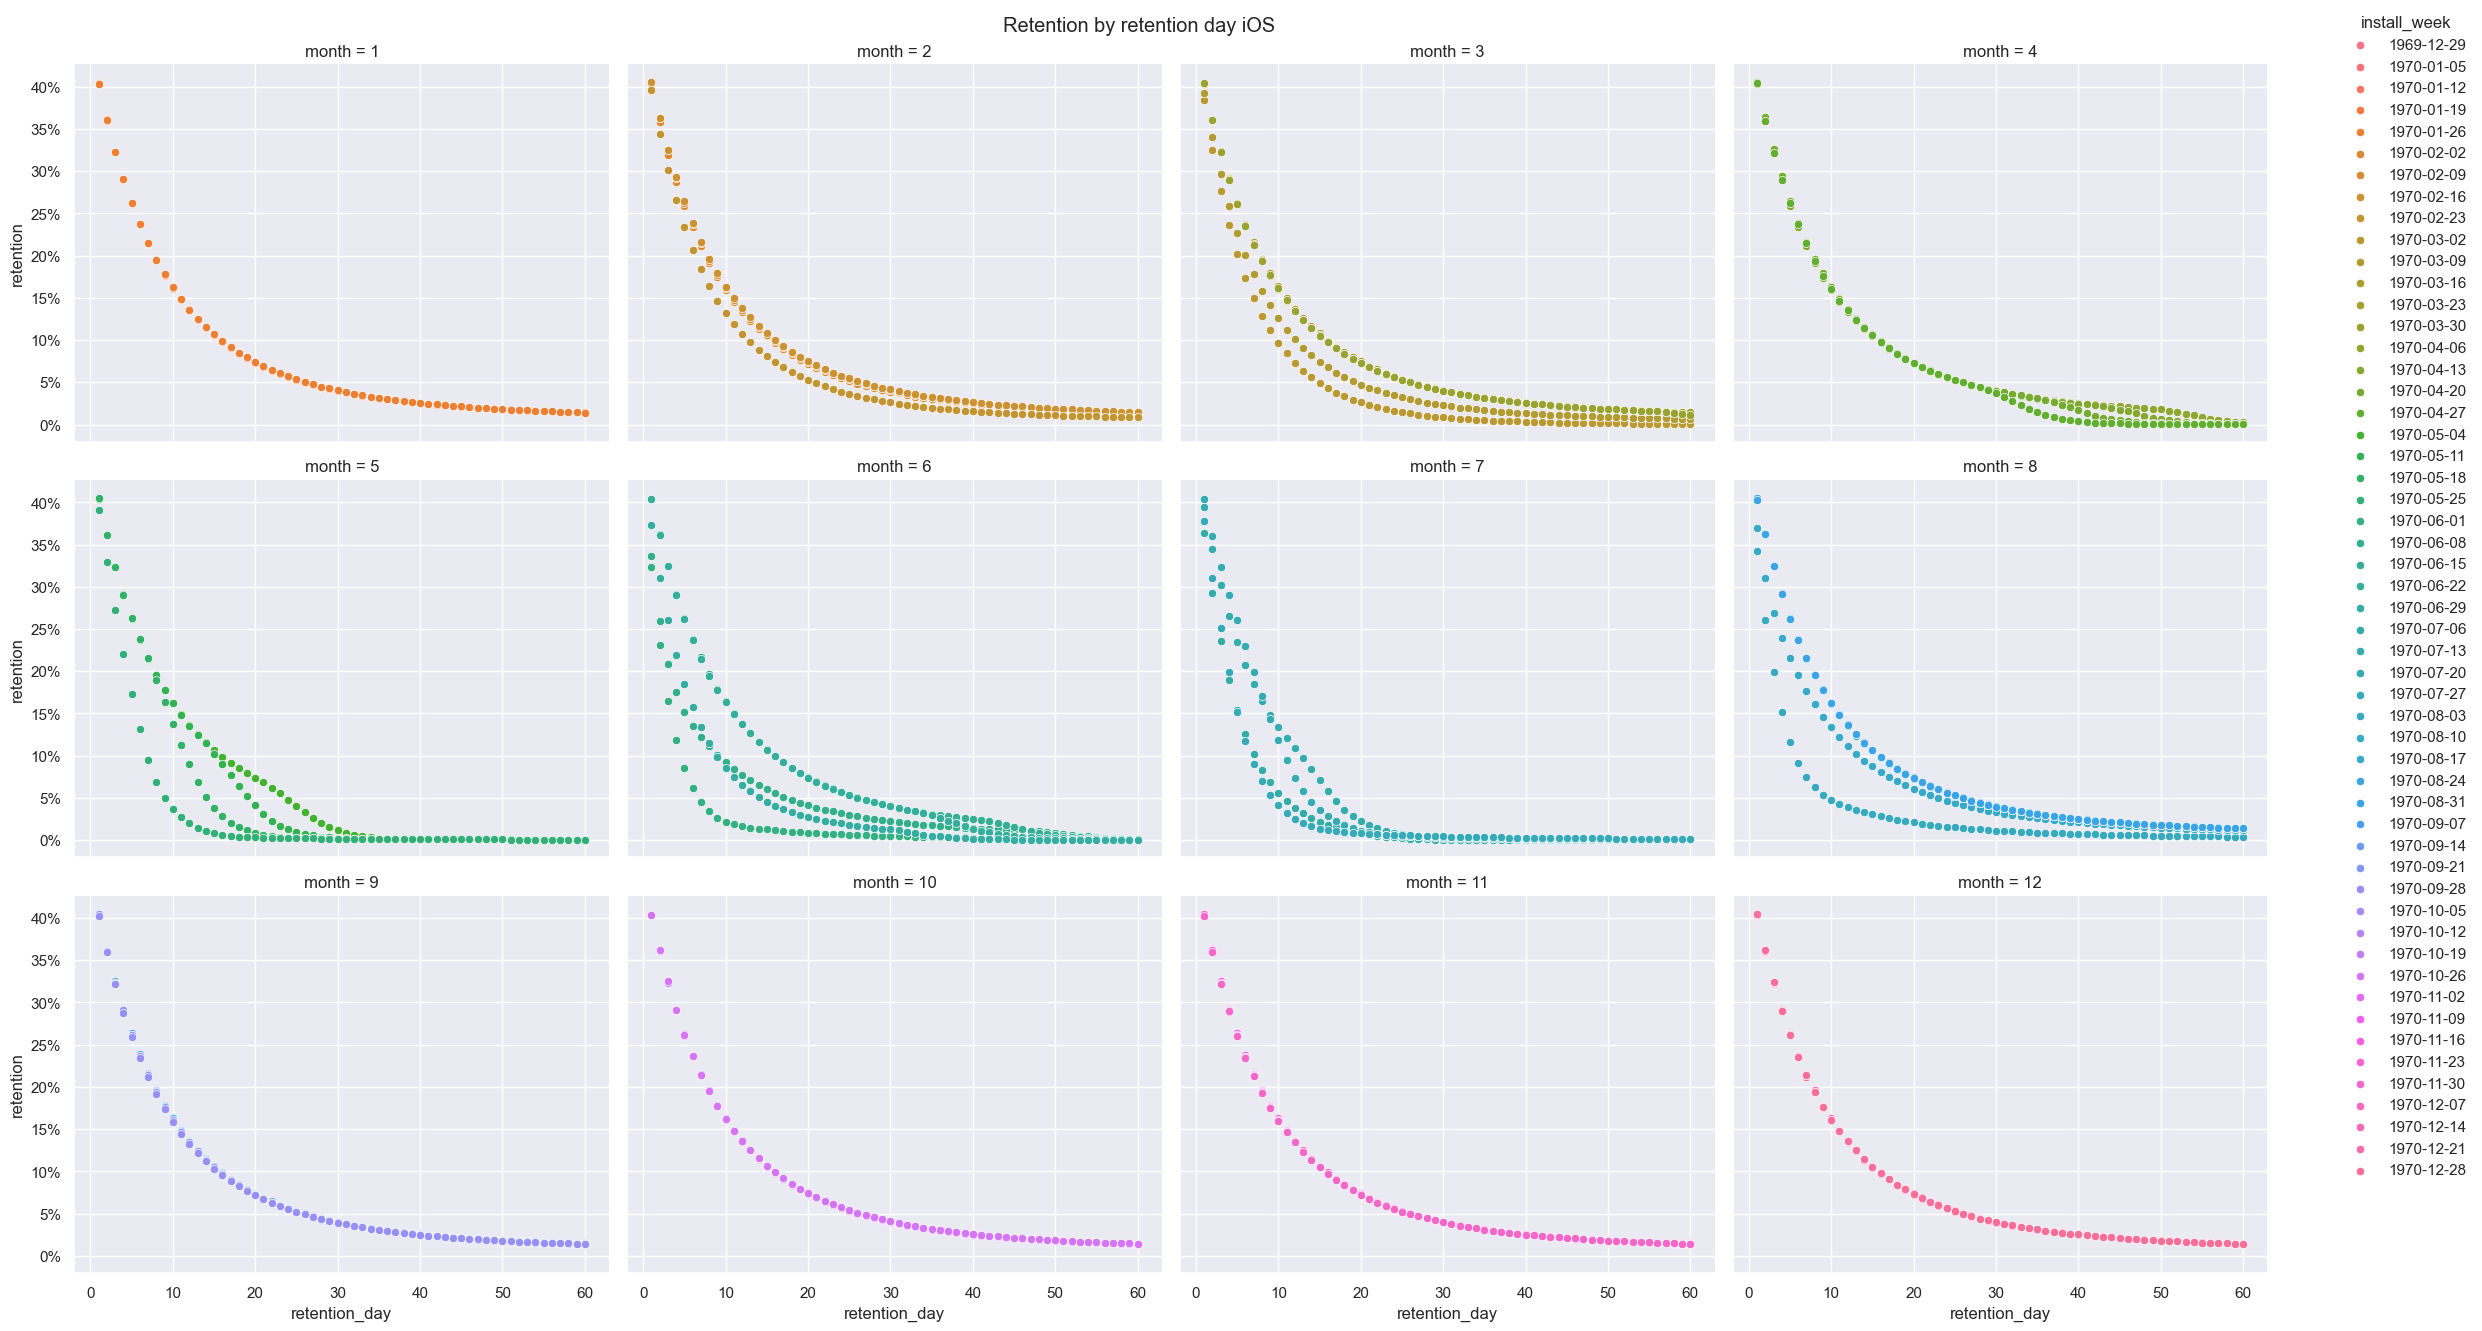

In [19]:
# Plotting retention for os
os_selection = 'iOS'
g = sns.FacetGrid(df_retention_full_week[df_retention_full_week['operating_system'] == os_selection],
    col='month', hue='install_week',
    col_wrap=4, sharey=True,
    height=4.5, aspect=1.2)
g.map(sns.scatterplot, 'retention_day', 'retention')
g.add_legend()
sns.move_legend(g, loc='center left', bbox_to_anchor=(1.02, .55), frameon=False)
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{y*100:.0f}%'))
g.figure.suptitle(f'Retention by retention day {os_selection}')
g.figure.tight_layout()

- We can observe that the drops are inconsistent and happen at different points in time depending on the week for the problematic periods, some before day 10 and some after day 20
- This highlights the conflict of data integrity, having retention drops so rapidly changing across weeks when looking at the retention day

## DAU

In [20]:
# Adding dau columns in different format
dau_columns = []
df_dau = df.copy()
for i in range(0,61):
    dau_name = i
    dau_old_name = f"""d{i}_dau"""
    df_dau[dau_name] = df_dau[dau_old_name]
    dau_columns.append(dau_name)

# Formatting dataframe for dau logic
df_dau_t = df_dau.melt(id_vars=['install_date','operating_system'],
                       value_vars=dau_columns, var_name='retention_day',value_name='dau')


In [21]:
df_dau_t.tail()

,install_date,operating_system,retention_day,dau
44525,1970-12-27,Android,60,1515
44526,1970-12-28,Android,60,1467
44527,1970-12-29,Android,60,1473
44528,1970-12-30,Android,60,1264
44529,1970-12-31,Android,60,1375


In [22]:
df_dau_t.head()

,install_date,operating_system,retention_day,dau
0,1970-01-01,iOS,0,48583
1,1970-01-02,iOS,0,49894
2,1970-01-03,iOS,0,51285
3,1970-01-04,iOS,0,50062
4,1970-01-05,iOS,0,54965


In [23]:
# Generating column for event date
df_dau_t['event_date'] = df_dau_t['install_date'] + pd.to_timedelta(df_dau_t['retention_day'], unit='d')
df_dau_t.tail()

,install_date,operating_system,retention_day,dau,event_date
44525,1970-12-27,Android,60,1515,1971-02-25
44526,1970-12-28,Android,60,1467,1971-02-26
44527,1970-12-29,Android,60,1473,1971-02-27
44528,1970-12-30,Android,60,1264,1971-02-28
44529,1970-12-31,Android,60,1375,1971-03-01


In [24]:
df_dau_t.head()

,install_date,operating_system,retention_day,dau,event_date
0,1970-01-01,iOS,0,48583,1970-01-01
1,1970-01-02,iOS,0,49894,1970-01-02
2,1970-01-03,iOS,0,51285,1970-01-03
3,1970-01-04,iOS,0,50062,1970-01-04
4,1970-01-05,iOS,0,54965,1970-01-05


In [25]:
# Group by event date
df_dau_event = df_dau_t.groupby(['operating_system','event_date']).sum().reset_index()
df_dau_event.tail()

,operating_system,event_date,dau
845,iOS,1971-02-25,22953
846,iOS,1971-02-26,18584
847,iOS,1971-02-27,14023
848,iOS,1971-02-28,9130
849,iOS,1971-03-01,4546


In [26]:
df_dau_event_pivot = df_dau_event.pivot_table(index=['event_date'], columns='operating_system', values='dau').reset_index()
df_dau_event_pivot = df_dau_event_pivot[df_dau_event_pivot['event_date'] <= '1970-12-31']
df_dau_event_pivot.tail()

operating_system,event_date,Android,iOS
360,1970-12-27,590664,1692083
361,1970-12-28,593458,1701488
362,1970-12-29,597412,1732105
363,1970-12-30,582312,1735893
364,1970-12-31,586130,1737641


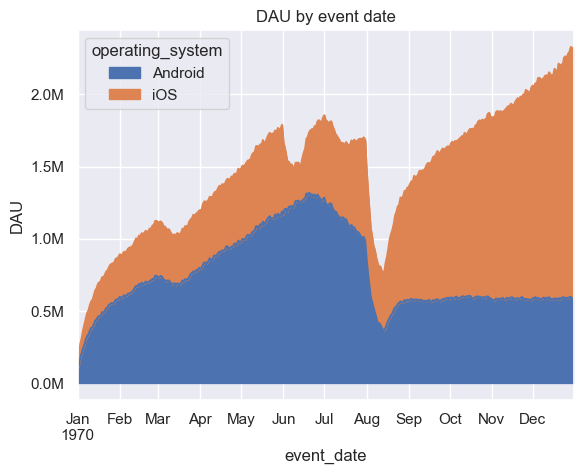

In [27]:
ax = df_dau_event_pivot.plot.area(x='event_date', y=['Android','iOS'])
plt.title('DAU by event date')
plt.ylabel('DAU')
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: f'{y/1000000:.1f}M'))

- We are taking a big assumption for this plot, there's no additional DAU than the event dates delivered, this is probably wrong but helps especially after August to see the fluctuation of users between operating systems. We are also ignoring DAU after 1970, because there could be new installs that we are not receiving
- We can see how the retention dips affect to the DAU and how they are more obvious for iOS. We can also see the decline in Android installs starting to affect Android DAU from July onwards
- During August we can observe how the changes in Installs affect over the DAU, with iOS being almost 2 times the DAU of Android

# Conclusions

- iOS campaigns seem to be delivering better results than iOS considering that installs are increasing exponentially over time. Android is stable at 90k installs.
- On the last date iOS has 3 times the installs from Android and almost 4 times the DAU
- It is important to investigate the retention drop in both platforms during March, is it an issue early in the game affecting retention over different periods or a problem in the user mix being targeted by the UA campaigns?
- It is important to review the retention changes between April and March, in particular for iOS. Is there an error in the pipelines affecting the calculation of the dau per cohort age? For iOS in specific months needs to be investigated starting even from day 1